In [6]:
import pandas_datareader as rd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

In [11]:
# Get the stock quote
goog = rd.DataReader('GOOG', data_source='yahoo', start='1980-01-01', end='2021-01-01')
goog['Close_prev'] = goog['Close'].shift(1)
goog['return'] = goog['Close_prev']/goog['Close'] - 1
goog['log_return'] = np.log1p(goog['return'])

In [12]:
data = goog['log_return'].dropna().to_numpy().reshape(-1 ,1)
model = GaussianMixture(n_components=2)
model.fit(data)

weights = model.weights_
means = model.means_
cov = model.covariances_
print('weights: ', weights)
print('means: ', means)
print('variances: ', cov)

weights:  [0.7132806 0.2867194]
means:  [[-1.23653534e-03]
 [ 6.59626320e-05]]
variances:  [[[0.00010939]]

 [[0.00100672]]]


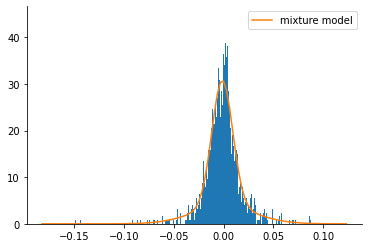

In [13]:
means = means.flatten()
var = cov.flatten()

x = np.linspace(data.min(), data.max(), 100)
fx0 = norm.pdf(x, means[0], np.sqrt(var[0]))
fx1 = norm.pdf(x, means[1], np.sqrt(var[1]))
fx = weights[0] * fx0 + weights[1] * fx1

goog['log_return'].hist(bins=1000, density=True)
plt.plot(x_list, fx, label='mixture model')
plt.grid(False)
sns.despine()
plt.legend();

The property that GMM has heavy tail can better model the return distribution.